# Fragestellung 1.1: 
## Wie gross ist der Anteil fossiler Heizungen in einer Gemeinde?

Um diese Frage zu beantworten, werden Daten aus dem "Gebäude- und Wohnungsregister" (GWR) verwendet. <br>
[Link zum GWR](https://www.housing-stat.ch/de/index.html)<br>
[Link zur GWR Dokumentation](https://www.housing-stat.ch/de/docs/index.html)<br>
[Link zum GWR Download](https://www.housing-stat.ch/de/madd/public.html)<br>
<br>
Die Daten werden nach Gemeinde und Energiequelle gruppiert und dann die einzelnen Objekte gezählt. <br>
Anschliessend wird die resultierende Liste als CSV-Datei zur weiterverarbeitung bzw. Visualisierung exportiert.<br>
<br>
---
<i> CAS Spatial Data Analytics 2022 </i> ¦ <i> Kommunale Übersicht von Heizsystemen und Energieträgern in Wohngebäuden </i> ¦ <i> Stand: 22.09.2022  </i> ¦ <i> Entwickler: Jürg Reist </i>

### Notebook vorbereiten und die benötigten Daten aus dem GWR einlesen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#lesen GWR Daten
dfGWRSource = pd.read_csv('GWR_Data/gebaeude_batiment_edificio_CH.csv', usecols=['GGDENAME','GKODE', 'GKODN', 'GENH1', 'GWAERSCEH1', 'GWAERDATH1'],  sep='\t')


In [2]:
#Column mit geeigneten Namen
dfGWRSource = dfGWRSource.rename(columns={"GGDENAME": "Gemeinde",
                              "GKODE": "lat",
                              "GKODN": "lon",
                              "GENH1":"Energiequelle",
                              "GWAERSCEH1":"Quelle",
                              "GWAERDATH1": "Update"})

In [3]:
dfGWRSource

,Gemeinde,lat,lon,Energiequelle,Quelle,Update
0,Aeugst am Albis,2679647.268,1237500.347,7530.0,860.0,2002-09-05
1,Aeugst am Albis,2680635.900,1236936.229,7530.0,860.0,2002-09-05
2,Aeugst am Albis,2679016.828,1235828.156,7530.0,860.0,2002-09-05
3,Aeugst am Albis,2679677.869,1237453.256,7530.0,869.0,2001-11-29
4,Aeugst am Albis,2679692.997,1237491.284,7530.0,869.0,2014-01-14
...,...,...,...,...,...,...
3053218,La Baroche,2582768.637,1251359.261,7530.0,860.0,2001-11-29
3053219,La Baroche,2582743.072,1251406.135,7530.0,860.0,2001-11-29
3053220,La Baroche,2584600.501,1251495.804,7520.0,860.0,2001-11-29
3053221,La Baroche,2583393.948,1251448.443,7540.0,860.0,2001-11-29


In [4]:
# Die korrekten Bezeichnungen den Heizcodes zuweisen und als Liste speichern.
dfGWRSource['Energiequelle'] = dfGWRSource.Energiequelle.replace({
                                            7500: 'Keine',
                                            7501: 'Luft',
                                            7510: 'Erdwärme',
                                            7511: 'Erdwärme',
                                            7512: 'Erdwärme',
                                            7513: 'Wasser',
                                            7520: 'Gas',
                                            7530: 'Heizöl',
                                            7540: 'Holz',
                                            7541: 'Holz',
                                            7542: 'Holz',
                                            7543: 'Holz',
                                            7550: 'Abwärme',
                                            7560: 'Elektrizität',
                                            7570: 'Sonne',
                                            7580: 'Fernwärme',
                                            7581: 'Ferwärme',
                                            7582: 'Fernwärme',
                                            7598: 'Unbestimmt',
                                            7599: 'Keine'
                                            })

In [5]:
# Die korrekten Bezeichnungen der Informationsquellen zuweisen und als Liste speichern.
dfGWRSource['Quelle'] = dfGWRSource.Quelle.replace({
                                            852: 'Gemäss amtliche Schätzung',
                                            853: 'Gemäss Gebäudeversicherung',
                                            855: 'Gemäss Kontrolle der Heizungseinrichtungen',
                                            857: 'Gemäss Eigentümer/in / Verwaltung',
                                            858: 'Gemäss Gebäudeenergieausweis der Kantone (GEAK)',
                                            859: 'Andere Informationsquelle',
                                            860: 'Gemäss Volkszählung 2000',
                                            864: 'Gemäss Daten des Kantons',
                                            865: 'Gemäss Daten der Gemeinde',
                                            869: 'Gemäss Baubewilligung',
                                            870: 'Gemäss Versorgungswerk (Gas, Fernwärme)',
                                            871: 'Gemäss Minergie'
                                            })

In [6]:
dfGWRSource

,Gemeinde,lat,lon,Energiequelle,Quelle,Update
0,Aeugst am Albis,2679647.268,1237500.347,Heizöl,Gemäss Volkszählung 2000,2002-09-05
1,Aeugst am Albis,2680635.900,1236936.229,Heizöl,Gemäss Volkszählung 2000,2002-09-05
2,Aeugst am Albis,2679016.828,1235828.156,Heizöl,Gemäss Volkszählung 2000,2002-09-05
3,Aeugst am Albis,2679677.869,1237453.256,Heizöl,Gemäss Baubewilligung,2001-11-29
4,Aeugst am Albis,2679692.997,1237491.284,Heizöl,Gemäss Baubewilligung,2014-01-14
...,...,...,...,...,...,...
3053218,La Baroche,2582768.637,1251359.261,Heizöl,Gemäss Volkszählung 2000,2001-11-29
3053219,La Baroche,2582743.072,1251406.135,Heizöl,Gemäss Volkszählung 2000,2001-11-29
3053220,La Baroche,2584600.501,1251495.804,Gas,Gemäss Volkszählung 2000,2001-11-29
3053221,La Baroche,2583393.948,1251448.443,Holz,Gemäss Volkszählung 2000,2001-11-29


In [7]:
#Nullwerte anschauen
dfGWRSource_null = dfGWRSource.isnull().sum()
dfGWRSource_null

Gemeinde              0
lat                 255
lon                 255
Energiequelle    958601
Quelle           973961
Update           968575
dtype: int64

### Nur die Attribute in ein neues Dataframe speichern, die ausgewertet werden sollen

In [8]:
#Datenframe für Verteilung der Energietrager pro Gemeinde
dfEnergyProGemeinde = dfGWRSource[['Gemeinde','Energiequelle']]
dfEnergyProGemeinde

,Gemeinde,Energiequelle
0,Aeugst am Albis,Heizöl
1,Aeugst am Albis,Heizöl
2,Aeugst am Albis,Heizöl
3,Aeugst am Albis,Heizöl
4,Aeugst am Albis,Heizöl
...,...,...
3053218,La Baroche,Heizöl
3053219,La Baroche,Heizöl
3053220,La Baroche,Gas
3053221,La Baroche,Holz


### Zählen aller Gebäude pro Gemeinde und deren Energiequelle inkl. Nullwerte

In [9]:
#Zählt alle Gebäude pro Gemeinde und deren Energiequelle inkl. Nullwerte
dfEnergyProGemeinde = dfEnergyProGemeinde[['Gemeinde','Energiequelle']].value_counts(dropna=False).reset_index()
dfEnergyProGemeinde

,Gemeinde,Energiequelle,0
0,Zürich,Gas,21658
1,Zürich,Heizöl,12714
2,Zürich,Keine,12445
3,Basel,Fernwärme,9660
4,Basel,Gas,8812
...,...,...,...
21454,Thurnen,Gas,1
21455,Arogno,Erdwärme,1
21456,Pfungen,Luft,1
21457,Le Bémont (JU),Erdwärme,1


### Spalten benennen und Daten in ein CSV-File exportieren

In [10]:
#Spaltenaen neu definieren
dfEnergyProGemeinde.columns  = ['Gemeinde','Energiequelle','Anzahl']
dfEnergyProGemeinde

,Gemeinde,Energiequelle,Anzahl
0,Zürich,Gas,21658
1,Zürich,Heizöl,12714
2,Zürich,Keine,12445
3,Basel,Fernwärme,9660
4,Basel,Gas,8812
...,...,...,...
21454,Thurnen,Gas,1
21455,Arogno,Erdwärme,1
21456,Pfungen,Luft,1
21457,Le Bémont (JU),Erdwärme,1


In [11]:
#Als CSV-File exportieren
dfEnergyProGemeinde.to_csv('Export_Data/EnergyProGemeinde_CH.csv',sep=',', encoding="utf-8-sig")

### Barplot einer ausgewählten Gemeinde

In [13]:
#Nur Ammerswil als Gemeinde auswählen!
dfselect = dfEnergyProGemeinde.loc[(dfEnergyProGemeinde['Gemeinde']=='Ammerswil')]
dfselect

,Gemeinde,Energiequelle,Anzahl
2,Ammerswil,NaN,137
4,Ammerswil,Heizöl,92
5,Ammerswil,Unbestimmt,90
7,Ammerswil,Holz,38
10,Ammerswil,Elektrizität,16
11,Ammerswil,Fernwärme,9
13,Ammerswil,Keine,7
15,Ammerswil,Luft,5
17,Ammerswil,Erdwärme,1


In [14]:
#Titel für Chart definieren
strGemeindename = dfselect['Gemeinde'][2]


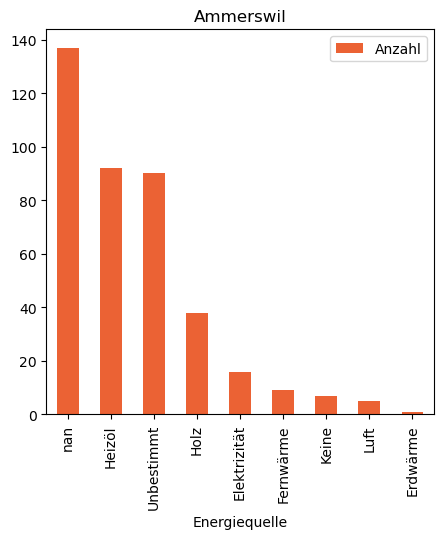

In [16]:
#Barplot 
dfselect.plot(x="Energiequelle",
              y="Anzahl",
              kind="bar",
              color='#eb6234',
              title = strGemeindename,
              fontsize = 10,
              figsize=(5, 5)) 

plt.savefig('Export_Data/Charts/EnergyAmmerswil_bar.svg',
            dpi=96,
            bbox_inches='tight',
            transparent = True)
plt.show()

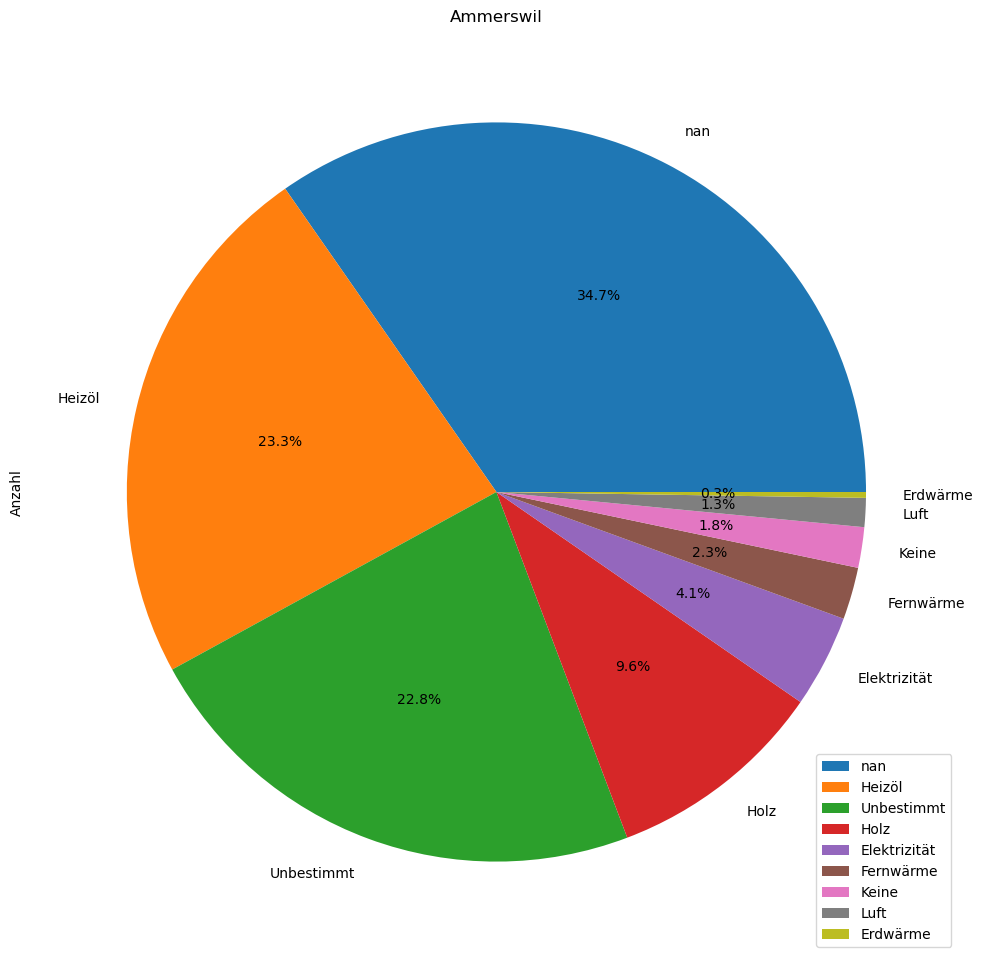

In [17]:
#Pie Plot
plot = dfselect.plot.pie(y="Anzahl",
                         figsize=(12, 12),
                         labels = dfselect.Energiequelle.unique(),
                         autopct='%1.1f%%',
                         title = strGemeindename,
                         fontsize = 10)

plt.savefig('Export_Data/Charts/EnergyAmmerswil_pie.svg',
            dpi=96,
            bbox_inches='tight',
            transparent = True)
plt.show()